# Demo progressive shape interpolation

In [1]:
import sys
sys.path.append('C:/Users/Erwan/Desktop/Stage_2A/Gromov-Wasserstein/codes/gw')
import gromov
import mapping
import scipy as sp
import numpy as np
import updates
import ot
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import mpl_toolkits.axes_grid1 as axes_grid1

# Data definition

In [2]:
import scipy.ndimage as spi

carre=spi.imread('C:/Users/Erwan/Desktop/Stage_2A/Shapes/carre.png').astype(np.float64)/256
rond=spi.imread('C:/Users/Erwan/Desktop/Stage_2A/Shapes/rond.png').astype(np.float64)/256
triangle=spi.imread('C:/Users/Erwan/Desktop/Stage_2A/Shapes/triangle.png').astype(np.float64)/256
fleche=spi.imread('C:/Users/Erwan/Desktop/Stage_2A/Shapes/coeur.png').astype(np.float64)/256

def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0]*I.shape[1],I.shape[2]))

carre=im2mat(carre)
carre=carre[:,2]
carre=carre.reshape((8,8))
pl.imshow(carre)

rond=im2mat(rond)
rond=rond[:,2]
rond=rond.reshape((8,8))
pl.imshow(rond)

triangle=im2mat(triangle)
triangle=triangle[:,2]
triangle=triangle.reshape((8,8))
pl.imshow(triangle)

fleche=im2mat(fleche)
fleche=fleche[:,2]
fleche=fleche.reshape((8,8))
pl.imshow(fleche)


shapes=[carre,rond,triangle,fleche]

S=4
xs=[[] for i in range(S)]


for nb in range(4):
    for i in range(8):
        for j in range(8):
            if shapes[nb][i,j]!=0.99609375:
                xs[nb].append([j,8-i])

xs=np.array([np.array(xs[0]),np.array(xs[1]),np.array(xs[2]),np.array(xs[3])])


Distribution generation :

In [3]:
ns=[len(xs[s]) for s in range(S)]
N=30

ps=[ot.unif(ns[s]) for s in range(S)]
p=ot.unif(N)
p=p.reshape(1,len(p)).T
ps=[ps[s].reshape(1,len(ps[s])).T for s in range(S)]

Cost matrix generation :

In [4]:
Cs=[sp.spatial.distance.cdist(xs[s],xs[s]) for s in range(S)]
Cs=[cs/cs.max() for cs in Cs]

# Plot dataset

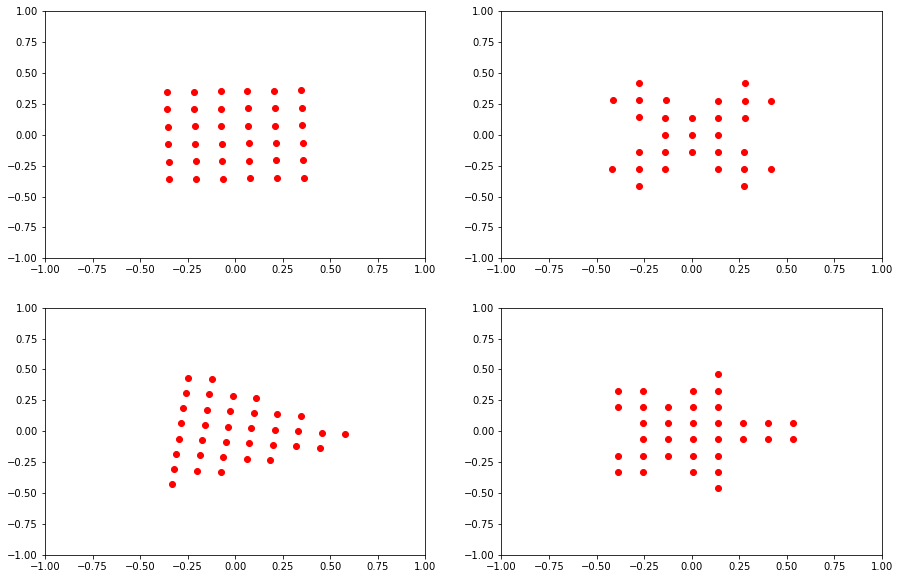

In [6]:
npos=[0,0,0,0]
npos=[mapping.smacof_mds(Cs[s],2) for s in range(S)]

clf = PCA(n_components=2)

npos=[clf.fit_transform(npos[s]) for s in range(S)]

fig=pl.figure(figsize=(15,10))

ax1=fig.add_subplot(221)
pl.xlim((-1,1))
pl.ylim((-1,1))
ax1.scatter(npos[0][:,0],npos[0][:,1],color='r')

ax2=fig.add_subplot(222)
pl.xlim((-1,1))
pl.ylim((-1,1))
ax2.scatter(npos[1][:,0],npos[1][:,1],color='r')

ax3=fig.add_subplot(223)
pl.xlim((-1,1))
pl.ylim((-1,1))
ax3.scatter(npos[2][:,0],npos[2][:,1],color='r')

ax4=fig.add_subplot(224)
pl.xlim((-1,1))
pl.ylim((-1,1))
ax4.scatter(npos[3][:,0],npos[3][:,1],color='r')


pl.show()

# Plot cost matrices

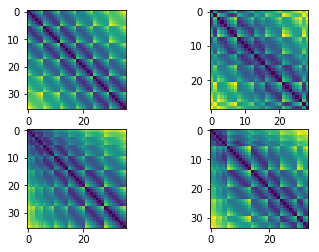

In [7]:
fig=pl.figure()

ax1=fig.add_subplot(221)
ax1.imshow(Cs[0])

ax2=fig.add_subplot(222)
ax2.imshow(Cs[1])

ax3=fig.add_subplot(223)
ax3.imshow(Cs[2])

ax4=fig.add_subplot(224)
ax4.imshow(Cs[3])


pl.show()

# Define weigths

In [8]:
lambdast=[[i/3,(3-i)/3] for i in [1,2]]

# Solve Gromov-Wasserstein barycenter

In [10]:
Ct01=[0 for i in range(2)]
for i in range(2):
    Ct01[i]=gromov.gromov_barycenters(N,[Cs[0],Cs[1]],[ps[0],ps[1]],p,lambdast[i],'square_loss',5e-4,numItermax=100,stopThr=1e-3)

Ct02=[0 for i in range(2)]
for i in range(2):
    Ct02[i]=gromov.gromov_barycenters(N,[Cs[0],Cs[2]],[ps[0],ps[2]],p,lambdast[i],'square_loss',5e-4,numItermax=100,stopThr=1e-3)

Ct13=[0 for i in range(2)]
for i in range(2):
    Ct13[i]=gromov.gromov_barycenters(N,[Cs[1],Cs[3]],[ps[1],ps[3]],p,lambdast[i],'square_loss',5e-4,numItermax=100,stopThr=1e-3)

Ct23=[0 for i in range(2)]
for i in range(2):
    Ct23[i]=gromov.gromov_barycenters(N,[Cs[2],Cs[3]],[ps[2],ps[3]],p,lambdast[i],'square_loss',5e-4,numItermax=100,stopThr=1e-3)

# Interpolated data by mds

In [11]:
npost01=[0,0]
npost01=[mapping.smacof_mds(Ct01[s],2) for s in range(2)]
npost01=[clf.fit_transform(npost01[s]) for s in range(2)]

npost02=[0,0]
npost02=[mapping.smacof_mds(Ct02[s],2) for s in range(2)]
npost02=[clf.fit_transform(npost02[s]) for s in range(2)]

npost13=[0,0]
npost13=[mapping.smacof_mds(Ct13[s],2) for s in range(2)]
npost13=[clf.fit_transform(npost13[s]) for s in range(2)]

npost23=[0,0]
npost23=[mapping.smacof_mds(Ct23[s],2) for s in range(2)]
npost23=[clf.fit_transform(npost23[s]) for s in range(2)]

# Plotting interpolated data

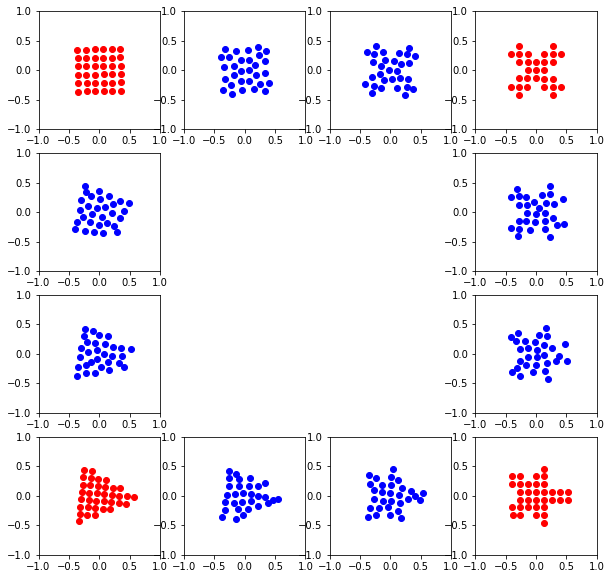

In [12]:
fig=pl.figure(figsize=(10,10))

ax1=pl.subplot2grid((4,4), (0,0))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax1.scatter(npos[0][:,0],npos[0][:,1],color='r')

ax2=pl.subplot2grid((4,4), (0,1))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax2.scatter(npost01[1][:,0],npost01[1][:,1],color='b')

ax3=pl.subplot2grid((4,4), (0,2))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax3.scatter(npost01[0][:,0],npost01[0][:,1],color='b')

ax4=pl.subplot2grid((4,4), (0,3))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax4.scatter(npos[1][:,0],npos[1][:,1],color='r')

ax5=ax4=pl.subplot2grid((4,4), (1,0))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax5.scatter(npost02[1][:,0],npost02[1][:,1],color='b')

ax6=ax4=pl.subplot2grid((4,4), (1,3))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax6.scatter(npost13[1][:,0],npost13[1][:,1],color='b')

ax7=ax4=pl.subplot2grid((4,4), (2,0))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax7.scatter(npost02[0][:,0],npost02[0][:,1],color='b')

ax8=ax4=pl.subplot2grid((4,4), (2,3))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax8.scatter(npost13[0][:,0],npost13[0][:,1],color='b')

ax9=ax4=pl.subplot2grid((4,4), (3,0))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax9.scatter(npos[2][:,0],npos[2][:,1],color='r')

ax10=ax4=pl.subplot2grid((4,4), (3,1))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax10.scatter(npost23[1][:,0],npost23[1][:,1],color='b')

ax11=ax4=pl.subplot2grid((4,4), (3,2))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax11.scatter(npost23[0][:,0],npost23[0][:,1],color='b')

ax12=ax4=pl.subplot2grid((4,4), (3,3))
pl.xlim((-1,1))
pl.ylim((-1,1))
ax12.scatter(npos[3][:,0],npos[3][:,1],color='r')

pl.show()